In [ ]:
import numpy as np
np.linalg.svd(np.array([[1,2,3], [4,5,6]]), full_matrices=0, compute_uv=0)

In [8]:
import numpy as np
SVD = np.linalg.svd(np.array([[1,2,3], [4,5,6]]), full_matrices=0)
u, s, v = SVD
Ar = np.zeros((len(u), len(v)))
for i in range(1):
    Ar += s[i] * np.outer(u.T[i], v[i])

ValueError: operands could not be broadcast together with shapes (2,2) (2,3) (2,2) 

In [10]:
np.outer(u.T[0], v[0])

array([[ 0.1656017 ,  0.21877439,  0.27194707],
       [ 0.3953879 ,  0.52234212,  0.64929635]])

Automatically created module for IPython interactive environment


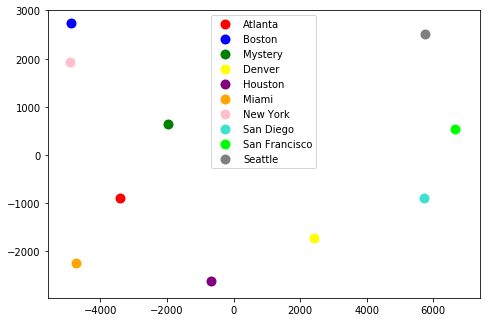

In [44]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = coolerData

similarities = euclidean_distances(X_true)


mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)


fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(pos[:, 0][0], pos[:, 1][0], color='red', s=s, lw=0, label='Atlanta')
plt.scatter(pos[:, 0][1], pos[:, 1][1], color='blue', s=s, lw=0, label='Boston')
plt.scatter(pos[:, 0][2], pos[:, 1][2], color='green', s=s, lw=0, label='Mystery')
plt.scatter(pos[:, 0][3], pos[:, 1][3], color='yellow', s=s, lw=0, label='Denver')
plt.scatter(pos[:, 0][4], pos[:, 1][4], color='purple', s=s, lw=0, label='Houston')
plt.scatter(pos[:, 0][5], pos[:, 1][5], color='orange', s=s, lw=0, label='Miami')
plt.scatter(pos[:, 0][6], pos[:, 1][6], color='pink', s=s, lw=0, label='New York')
plt.scatter(pos[:, 0][7], pos[:, 1][7], color='turquoise', s=s, lw=0, label='San Diego')
plt.scatter(pos[:, 0][8], pos[:, 1][8], color='lime', s=s, lw=0, label='San Francisco')
plt.scatter(pos[:, 0][9], pos[:, 1][9], color='grey', s=s, lw=0, label='Seattle')
plt.legend(scatterpoints=1, loc='best', shadow=False)


plt.show()

Automatically created module for IPython interactive environment


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide


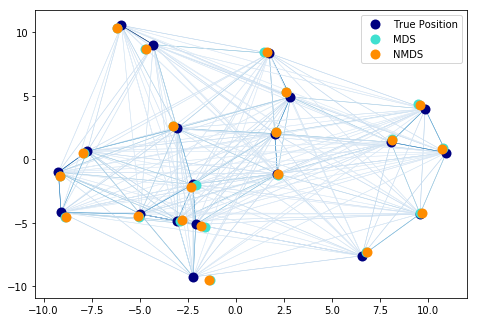

In [30]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()

In [24]:
f = open ( 'dist.txt' , 'r')
l = [ line.split(',') for line in f if line.strip() != "" ]
for i in range(len(l)):
    for j in range(len(l)):
        l[i][j] = int(l[i][j])
print (np.array(l))
coolerData = np.array(l)

[[   0  936  587 1210  701  606  746 1887 2135 2178]
 [ 936    0  850 1765 1603 1258  190 2578 2693 2485]
 [ 587  850    0  917  939 1189  712 1730 1854 1733]
 [1210 1765  917    0  878 1724 1627  833  948 1020]
 [ 701 1603  939  878    0  967 1417 1301 1642 1889]
 [ 606 1258 1189 1724  967    0 1092 2267 2590 2731]
 [ 746  190  712 1627 1417 1092    0 2427 2566 2402]
 [1887 2578 1730  833 1301 2267 2427    0  458 1064]
 [2135 2693 1854  948 1642 2590 2566  458    0  679]
 [2178 2485 1733 1020 1889 2731 2402 1064  679    0]]


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# create a list of list of unique colors for 4 plots
my_colors = [['red','green'],['blue','black'],['magenta','grey'],['purple','cyan']]


iterations=4
count=0
while(count<iterations):
    plt.figure()
    for i,j in enumerate(X):
        plt.scatter(X[count][i],Y[count][i],color = my_colors[count][status[count][i]])
    count=count+1
    plt.show()

NameError: name 'X' is not defined

In [34]:
pos[:, 0]

array([-3423.19635154, -4893.38120951, -1954.89356783,  2428.34696389,
        -682.15049541, -4733.13755051, -4898.82246365,  5733.58362787,
        6666.54907556,  5757.10197113])